### Importar as bibliotecas que vamos utilizar

In [1]:
import pandas as pd
import quantstats as qs

### Ler os dados

In [2]:
dados_empresas = pd.read_csv("dados_empresas (1).csv")

### Filtrar liquidez

In [3]:
dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000] # Pegamos empresas com volume negociado acima de 1 milhão apenas
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517
...,...,...,...,...,...,...
49268,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526
49269,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131
49270,2023-06-30,ZAMP3,4.55,17615157.0,0.04998,0.03131
49271,2023-07-31,ZAMP3,4.42,4634150.0,0.05094,0.03131


### Calcular os retornos mensais das empresas

1 : Criamos uma nova coluna na tabela chamada 'retorno', depois agrupamos por ticker e usamos a coluna de 'preco_fechamento_ajustado' para calcular o retorno mensal por porcentagem com pct_change()

2 : Jogamos os dados uma linha para cima com o comando .shift(-1), pois o retorno antes devolvia o valor referente ao mês anterior 

In [4]:
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()
dados_empresas['retorno'] = dados_empresas['retorno'].shift(-1) 
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890,-0.048443
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890,-0.086545
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890,0.226911
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517,0.188838
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517,-0.045306
...,...,...,...,...,...,...,...
49268,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526,-0.092857
49269,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131,0.194226
49270,2023-06-30,ZAMP3,4.55,17615157.0,0.04998,0.03131,-0.028571
49271,2023-07-31,ZAMP3,4.42,4634150.0,0.05094,0.03131,0.255656


### Criar o rankig dos indicadores

1 : Criamos o ranking_ebit_ev, agrupamos por data e criamos o rank do indicadores de maneira decrescente

2 : Criamos o ranking_roic, agrupamos por data e rankeamos de maneira decrescente


- Ev_Ebit = usa o EV(enterprise value) ve o quano a empresa vale em relação ao EBIT que é o resultado operacional da empresa, isolando os efeitos das despesas da empresa e dos impostos. Aqui nesse caso o indicador foi trocado para o valor negativo ficar por ultimo, assim a empresa "pior" fica ao final 

In [5]:
dados_empresas['ranking_ebit_ev'] = dados_empresas.groupby('data')['ebit_ev'].rank(ascending = False)
dados_empresas['ranking_roic'] = dados_empresas.groupby('data')['roic'].rank(ascending = False)



### Criamos um rank final

1: Criamos um frame chamado ranking_final, somando os outros 2 ranks

2: Depois rankeamos o ranking_final 

In [6]:
dados_empresas['ranking_final'] = dados_empresas['ranking_ebit_ev'] + dados_empresas['ranking_roic']
dados_empresas['ranking_final'] = dados_empresas.groupby('data')['ranking_final'].rank()

### Criar as carteiras

1: Pegamos as empresas com ranking_final <= 10


In [7]:
dados_empresas = dados_empresas[dados_empresas['ranking_final'] <= 10]
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ebit_ev,ranking_roic,ranking_final
1352,2016-03-31,ALSC3,12.45,6109292.0,0.22743,0.21115,0.201606,4.0,8.0,1.0
1353,2016-04-30,ALSC3,14.96,5974473.0,0.18712,0.21115,-0.185160,6.0,8.0,1.0
1354,2016-05-31,ALSC3,12.19,4164513.0,0.23420,0.21412,0.132896,4.0,7.0,2.0
1355,2016-06-30,ALSC3,13.81,2583221.0,0.20543,0.21412,0.027516,4.0,7.0,2.0
1356,2016-07-31,ALSC3,14.19,8624183.0,0.19963,0.21412,0.039464,3.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...
48554,2018-07-31,VULC3,5.15,5852761.0,0.17556,0.25297,-0.033010,7.0,6.0,2.0
48555,2018-08-31,VULC3,4.98,2394638.0,0.14699,0.21972,-0.072289,13.0,9.0,5.0
48556,2018-09-30,VULC3,4.62,1770684.0,0.15893,0.21972,0.233766,10.0,10.0,6.0
48557,2018-10-31,VULC3,5.70,3056020.0,0.12801,0.21972,0.017544,23.0,12.0,7.0


In [8]:
# Agrupando as 10 melhores de uma determinada data
dados_empresas[dados_empresas['data'] == '2016-12-31']


,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ebit_ev,ranking_roic,ranking_final
6143,2016-12-31,BRKM5,26.41,49019244.0,0.21739,0.27792,-0.049981,3.0,7.0,2.0
9995,2016-12-31,CGAS5,21.65,5291437.0,0.23616,0.19891,0.014319,2.0,10.0,3.0
12647,2016-12-31,CSAN3,8.01,27460524.0,0.15794,0.15629,0.056180,10.0,19.0,8.0
14257,2016-12-31,CVCB3,23.07,19340033.0,0.12925,0.33341,0.097096,19.0,4.0,5.0
29594,2016-12-31,MGLU3,0.41,3398343.0,0.14169,0.20670,0.195122,15.0,9.0,6.0
30456,2016-12-31,MPLU3,28.75,7130030.0,0.13783,1.24439,0.052870,16.0,1.0,4.0
40347,2016-12-31,SEER3,15.50,4524453.0,0.11476,0.19612,-0.049677,24.0,11.0,10.0
41470,2016-12-31,SMLE3,44.73,36275372.0,0.10197,0.47987,0.162531,31.0,2.0,9.0
44885,2016-12-31,TIET11,10.68,8224848.0,0.13207,0.21208,0.038390,17.0,8.0,7.0
46068,2016-12-31,TRPL4,9.66,19812514.0,0.65116,0.42669,0.012422,1.0,3.0,1.0


## Calcular rentabilidade por carteira

1 : Agrupamos por data e pegamos o retorno e fizemos a média com .mean()
2 : Pra não ser uma série temporal tranformamos em tabela novamente

Descobrimos a rentabilidade por carteira referente a data, para saber qual ativo é referente aquela data é só filtrar no código acima

In [9]:
rentabilidade_por_carteira = dados_empresas.groupby('data')['retorno'].mean()
rentabilidade_por_carteira = rentabilidade_por_carteira.to_frame()

rentabilidade_por_carteira

,retorno
data,
2012-12-31,-0.023145
2013-01-31,0.018198
2013-02-28,0.020285
2013-03-31,0.029401
2013-04-30,0.017235
...,...
2023-04-30,0.028877
2023-05-31,0.111190
2023-06-30,0.036242


### Calcular a rentabilidade do modelo


In [10]:
rentabilidade_por_carteira['retorno'] = (rentabilidade_por_carteira['retorno'] + 1).cumprod() - 1

In [11]:
rentabilidade_por_carteira

,retorno
data,
2012-12-31,-0.023145
2013-01-31,-0.005368
2013-02-28,0.014808
2013-03-31,0.044644
2013-04-30,0.062649
...,...
2023-04-30,8.079077
2023-05-31,9.088580
2023-06-30,9.454210


In [12]:
rentabilidade_por_carteira['retorno'] = rentabilidade_por_carteira['retorno'].shift(1)
rentabilidade_por_carteira = rentabilidade_por_carteira.dropna()

In [13]:
rentabilidade_por_carteira

,retorno
data,
2013-01-31,-0.023145
2013-02-28,-0.005368
2013-03-31,0.014808
2013-04-30,0.044644
2013-05-31,0.062649
...,...
2023-04-30,7.824258
2023-05-31,8.079077
2023-06-30,9.088580


### Calcular retorno do IBOV 

1 : Calculamos o retorno do ibovespa comparamos com a nossa carteira, pois de nada adianta o modelo se o retorno do IBOV for maior



In [17]:
ibov = pd.read_csv('ibov (1).csv')
retorno_ibov = ibov['fechamento'].pct_change().dropna()
retorno_ibov = (retorno_ibov + 1).cumprod() - 1
retorno_ibov

1     -0.019533
2     -0.057878
3     -0.075469
4     -0.082716
5     -0.122162
         ...   
124    0.713340
125    0.777381
126    0.937374
127    1.000637
128    0.898898
Name: fechamento, Length: 128, dtype: float64

In [20]:
rentabilidade_por_carteira['IBOV'] = retorno_ibov.values
rentabilidade_por_carteira

C:\Users\nicol\AppData\Local\Temp\ipykernel_12416\2577375986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rentabilidade_por_carteira['IBOV'] = retorno_ibov.values


,retorno,IBOV
data,,
2013-01-31,-0.023145,-0.019533
2013-02-28,-0.005368,-0.057878
2013-03-31,0.014808,-0.075469
2013-04-30,0.044644,-0.082716
2013-05-31,0.062649,-0.122162
...,...,...
2023-04-30,7.824258,0.713340
2023-05-31,8.079077,0.777381
2023-06-30,9.088580,0.937374


In [22]:
qs.extend_pandas()

In [23]:
rentabilidade_por_carteira.index = pd.to_datetime(rentabilidade_por_carteira.index)

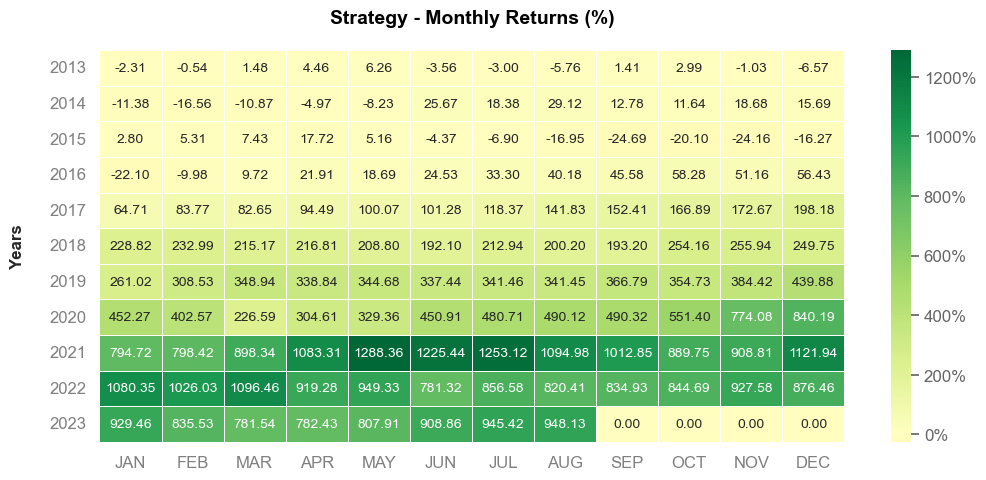

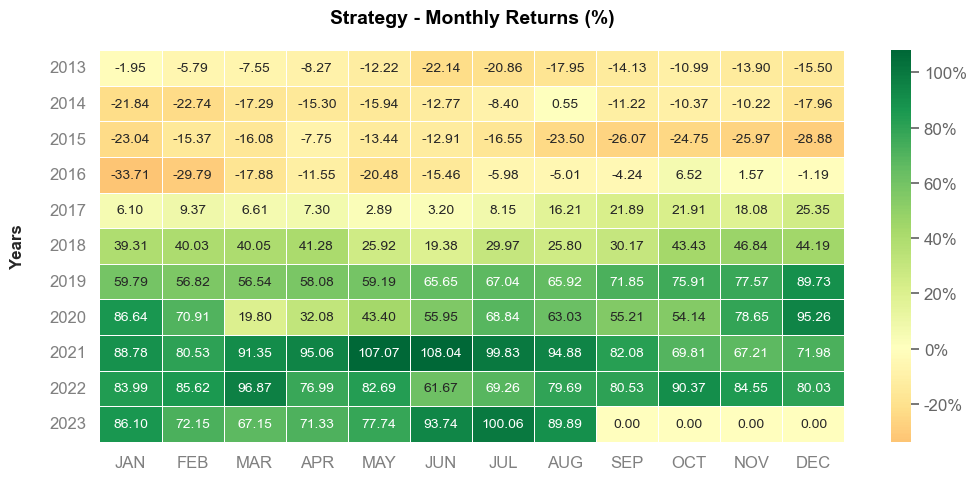

In [26]:
rentabilidade_por_carteira['retorno'].plot_monthly_heatmap()
rentabilidade_por_carteira['IBOV'].plot_monthly_heatmap()